In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re
import pywt
from scipy import signal
from scipy.signal import firwin, lfilter, iirnotch
from statistics import median
import math
from google.colab import files

In [77]:
VCC = 3.3
n = 10

Fs = 1000
uploaded = files.upload()

# Leer el archivo
file_name = "Reposo2.txt"
datos = np.loadtxt(file_name)
print(datos)
datos = datos[:, 8]
print(datos)
datos = 1000*((((datos/(2**n)) - 0.5) * VCC)/1009)

frec_muestreo = Fs
tiempo = np.arange(len(datos)) / frec_muestreo

Saving Reposo2.txt to Reposo2 (2).txt
[[  0.   0.   0. ... 463.  38.   0.]
 [  1.   0.   0. ... 302.  39.   0.]
 [  2.   0.   0. ... 137.  38.   0.]
 ...
 [  7.   0.   0. ... 667.  39.   0.]
 [  8.   0.   0. ... 703.  39.   0.]
 [  9.   0.   0. ... 716.  39.   0.]]
[463. 302. 137. ... 667. 703. 716.]


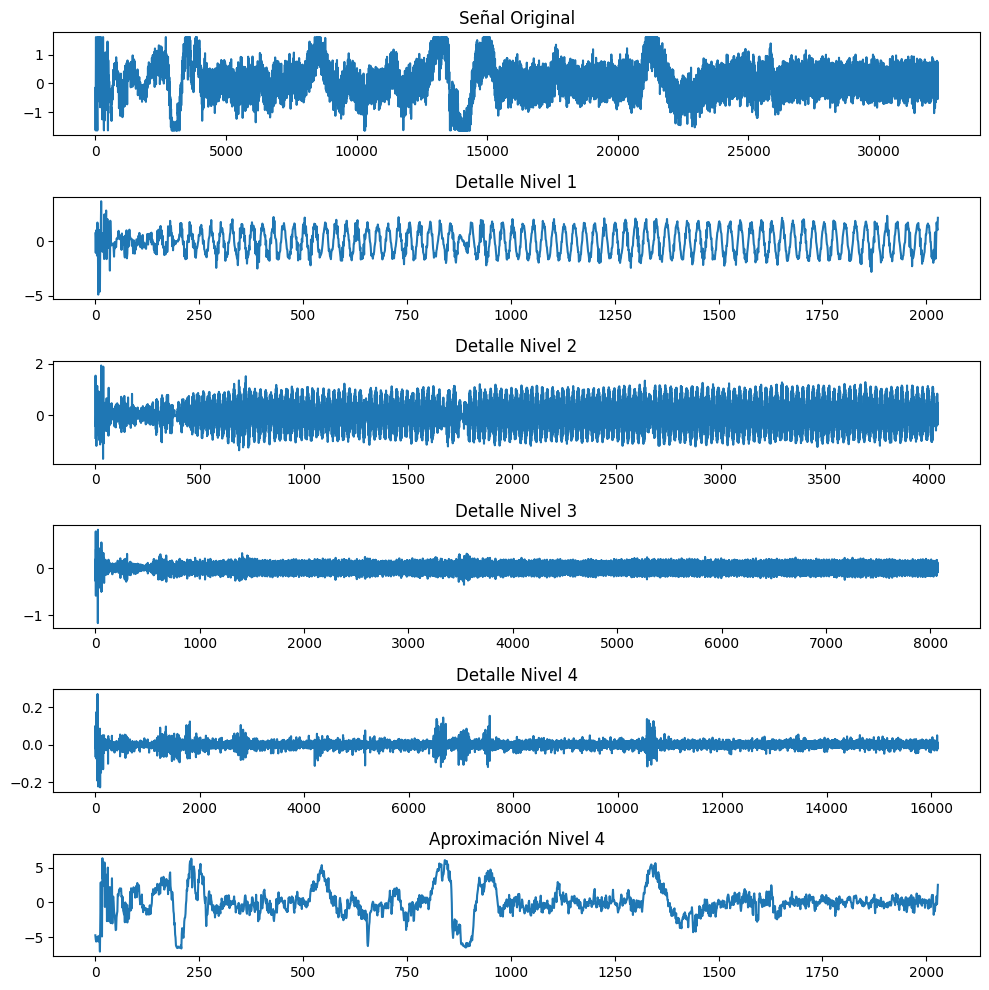

In [78]:

niveles = 4
coeficientes = pywt.wavedec(datos, 'db8', level=niveles)

plt.figure(figsize=(10, 10))
plt.subplot(niveles + 2, 1, 1)
plt.plot(datos)
plt.title('Señal Original')


for i, detalle in enumerate(coeficientes[1:]):
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación Nivel {niveles}')

plt.tight_layout()
plt.show()

-0.0003424451968020734


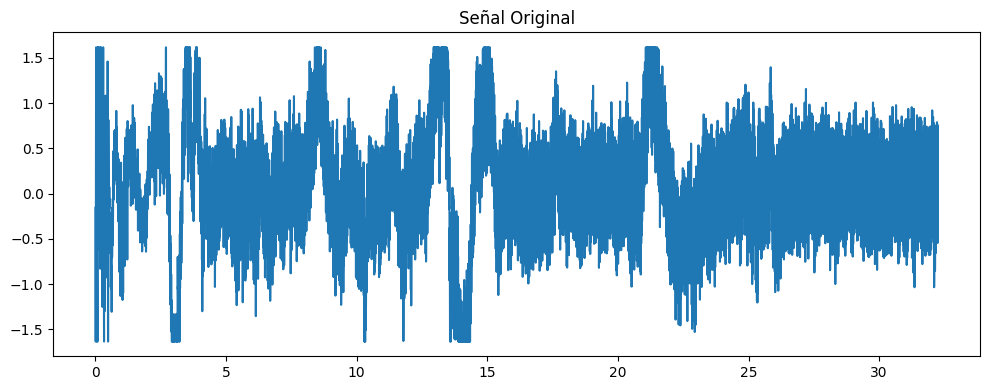

In [81]:


# Realizar la descomposición en wavelets
coeffs = pywt.wavedec(datos, 'db8', level=4)

# Establecer un umbral para el denoising
all_coeffs_flat = np.concatenate([c.flatten() for c in coeficientes])


desv = np.median(all_coeffs_flat)/0.6745
sq =  math.sqrt(math.log(len(datos)))
umbral = desv*sq
print(umbral)

Ts = 1/Fs
# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db8')

plt.figure(figsize=(10, 4))
t_1 = np.arange(0, len(datos)*Ts, Ts)
plt.plot( tiempo,datos, label='Señal Original')
plt.title('Señal Original')



plt.tight_layout()
plt.show()


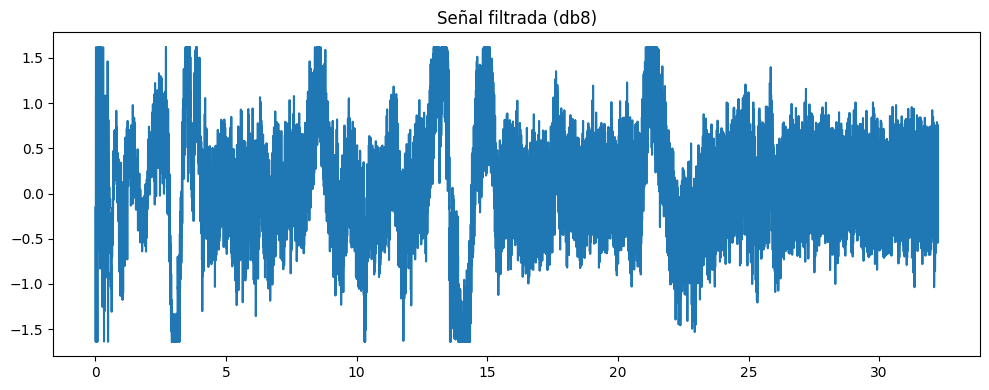

In [80]:
plt.figure(figsize=(10, 4))
plt.plot( tiempo,senal_denoised, label='Señal Denoised')
plt.title('Señal filtrada (db8)')

plt.tight_layout()
plt.show()

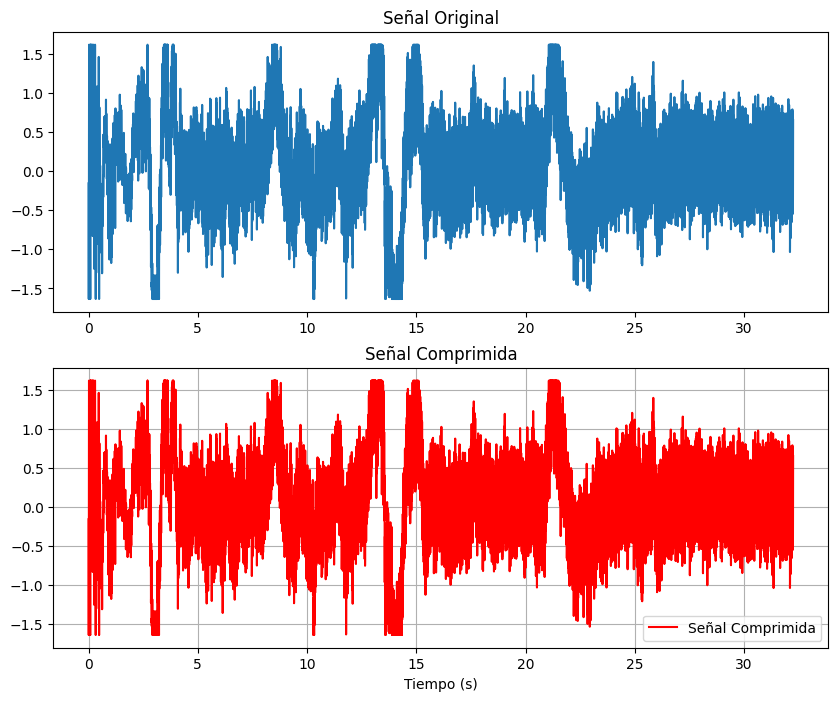

In [60]:
coef_aproximacion = coeffs_umbral[0]

# Reconstruir la señal comprimida
senal_comprimida = pywt.waverec([coef_aproximacion], 'db8')

# Obtener el tiempo correspondiente a los datos
t_2 = np.linspace(0, len(datos)/1000, len(senal_denoised))  # Suponiendo que la frecuencia de muestreo es 1000 Hz

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(tiempo, datos, label='Señal Original')
plt.title('Señal Original')


plt.subplot(2, 1, 2)
plt.plot(t_2, senal_denoised, label='Señal Comprimida', color='red')
plt.title('Señal Comprimida')
plt.xlabel('Tiempo (s)')

plt.legend()
plt.grid(True)
plt.show()



In [69]:
uploaded2 = files.upload()
VCC = 3.3
n = 10

Fs = 1000
# Leer el archivo
file_name2 = "AbrirYCerrar.txt"
datos1 = np.loadtxt(file_name2)
print(datos1)
datos1 = datos1[:, 8]
print(datos1)
datos1 = 1000*((((datos1/(2**n)) - 0.5) * VCC)/1009)

frec_muestreo = Fs
tiempo = np.arange(len(datos1)) / frec_muestreo

Saving AbrirYCerrar.txt to AbrirYCerrar (3).txt
[[  0.   0.   0. ... 701.  39.   0.]
 [  1.   0.   0. ... 719.  39.   0.]
 [  2.   0.   0. ... 718.  39.   0.]
 ...
 [ 11.   0.   0. ... 594.  39.   0.]
 [ 12.   0.   0. ... 576.  39.   0.]
 [ 13.   0.   0. ... 572.  39.   0.]]
[701. 719. 718. ... 594. 576. 572.]


5


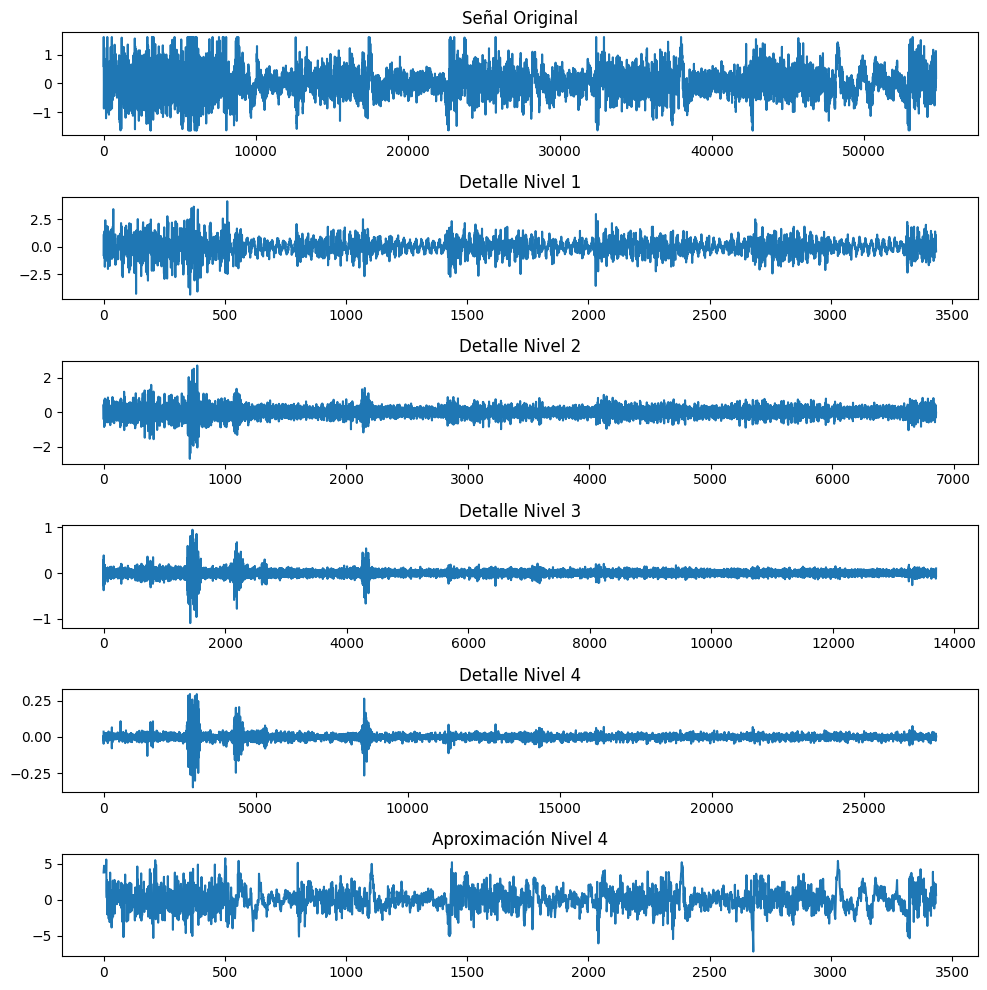

In [26]:

niveles = 4
coeficientes = pywt.wavedec(datos1, 'db8', level=niveles)
print(len(coeficientes))
plt.figure(figsize=(10, 10))
plt.subplot(niveles + 2, 1, 1)
plt.plot(datos1)
plt.title('Señal Original')


for i, detalle in enumerate(coeficientes[1:]):
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación Nivel {niveles}')

plt.tight_layout()
plt.show()

-0.0003510659773286154


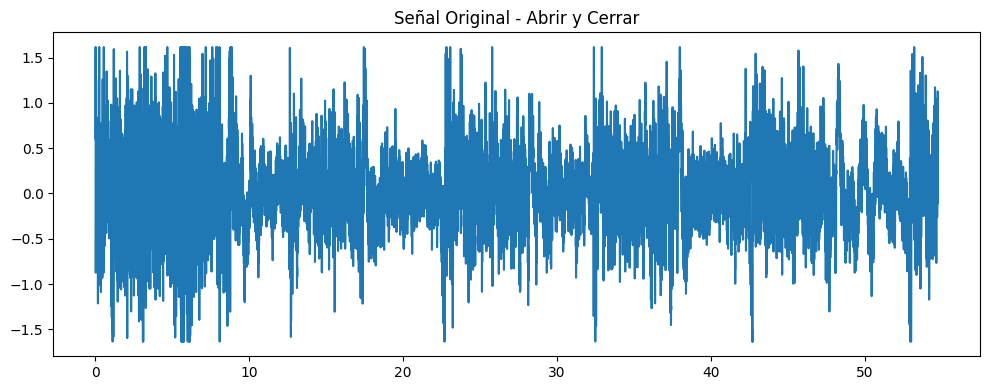

In [71]:


# Realizar la descomposición en wavelets
coeffs = pywt.wavedec(datos1, 'db8', level=4)

# Establecer un umbral para el denoising
all_coeffs_flat = np.concatenate([c.flatten() for c in coeficientes])


desv = np.median(all_coeffs_flat)/0.6745
sq =  math.sqrt(math.log(len(datos1)))
umbral = desv*sq
print(umbral)

Ts = 1/Fs
# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db8')

plt.figure(figsize=(10, 4))
tiempo = np.arange(len(datos1)) / Fs
plt.plot( tiempo,datos1, label='Señal Original')
plt.title('Señal Original - Abrir y Cerrar')


plt.tight_layout()
plt.show()


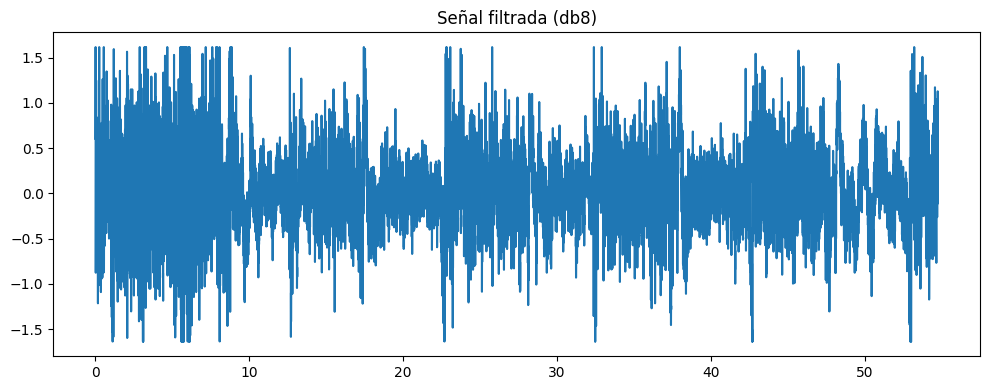

In [73]:
plt.figure(figsize=(10, 4))
plt.plot( tiempo,senal_denoised, label='Señal Denoised')
plt.title('Señal filtrada (db8)')
plt.tight_layout()
plt.show()


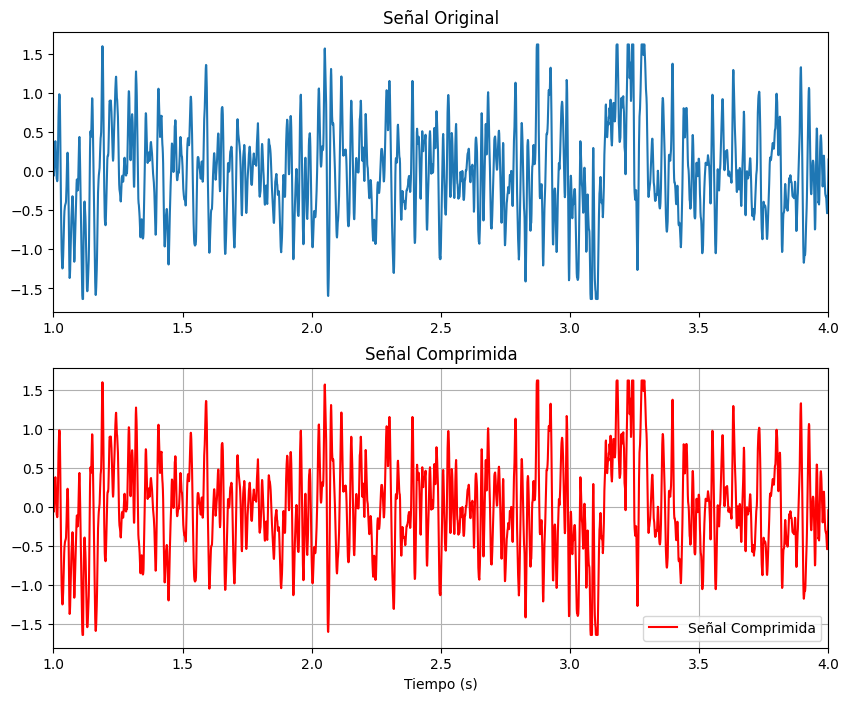

In [30]:
coef_aproximacion = coeffs_umbral[0]

# Reconstruir la señal comprimida
senal_comprimida = pywt.waverec([coef_aproximacion], 'db8')

# Obtener el tiempo correspondiente a los datos
t_2 = np.linspace(0, len(datos1)/1000, len(senal_denoised))  # Suponiendo que la frecuencia de muestreo es 1000 Hz

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(tiempo, datos1, label='Señal Original')
plt.xlim(1,4)
plt.title('Señal Original - Abrir y Cerrar')


plt.subplot(2, 1, 2)
plt.plot(t_2, senal_denoised, label='Señal Comprimida', color='red')
plt.xlim(1,4)
plt.title('Señal Comprimida')
plt.xlabel('Tiempo (s)')

plt.legend()
plt.grid(True)
plt.show()

In [31]:
uploaded2 = files.upload()
VCC = 3.3
n = 10

Fs = 1000
# Leer el archivo
file_name3 = "preguntas2.txt"
datos2 = np.loadtxt(file_name3)
print(datos2)
datos2 = datos2[:, 8]
print(datos2)
datos2 = 1000*((((datos2/(2**n)) - 0.5) * VCC)/1009)

frec_muestreo = Fs
tiempo = np.arange(len(datos2)) / frec_muestreo

Saving preguntas2.txt to preguntas2.txt
[[  0.   0.   0. ... 580.  39.   0.]
 [  1.   0.   0. ... 588.  39.   0.]
 [  2.   0.   0. ... 591.  39.   0.]
 ...
 [ 11.   0.   0. ... 483.  39.   0.]
 [ 12.   0.   0. ... 498.  39.   0.]
 [ 13.   0.   0. ... 497.  39.   0.]]
[580. 588. 591. ... 483. 498. 497.]


5


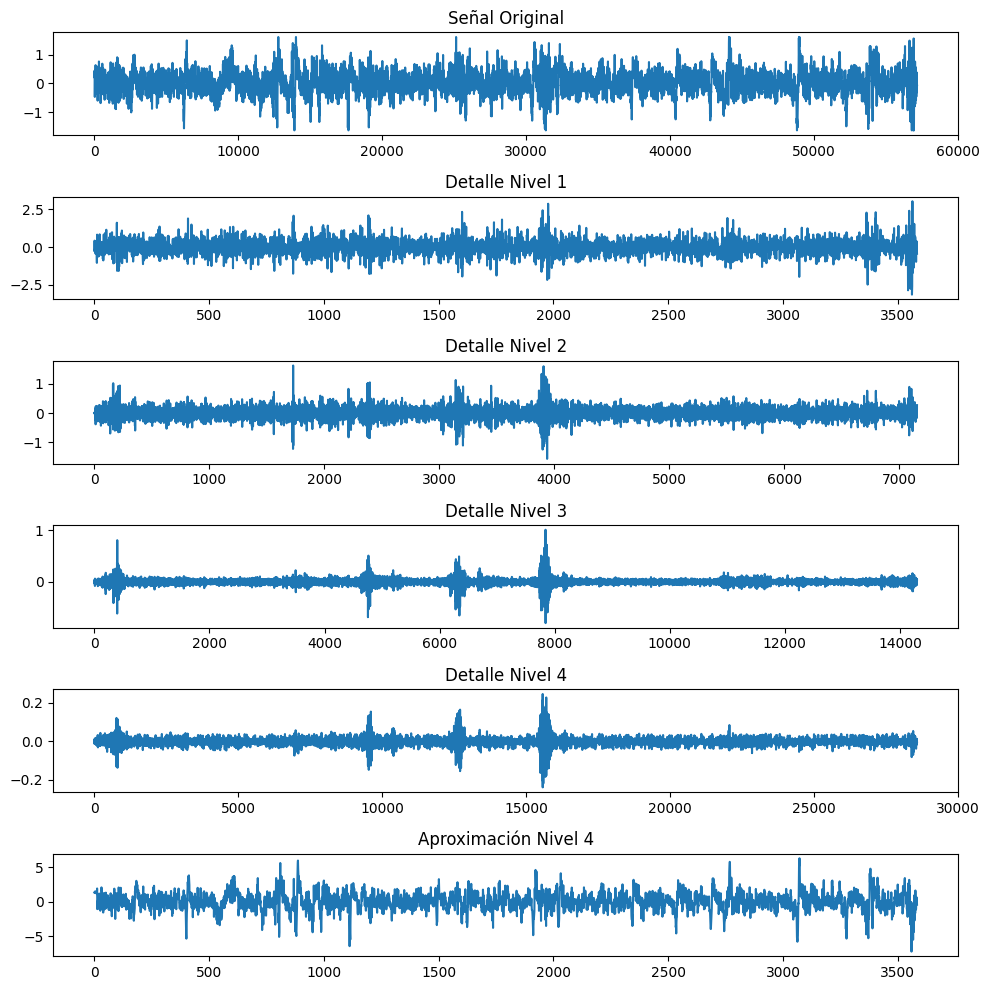

In [32]:
niveles = 4
coeficientes = pywt.wavedec(datos2, 'db8', level=niveles)
print(len(coeficientes))
plt.figure(figsize=(10, 10))
plt.subplot(niveles + 2, 1, 1)
plt.plot(datos2)
plt.title('Señal Original')


for i, detalle in enumerate(coeficientes[1:]):
    plt.subplot(niveles + 2, 1, i + 2)
    plt.plot(detalle)
    plt.title(f'Detalle Nivel {i+1}')

plt.subplot(niveles + 2, 1, niveles + 2)
plt.plot(coeficientes[0])
plt.title(f'Aproximación Nivel {niveles}')

plt.tight_layout()
plt.show()

-0.0003517555249257801


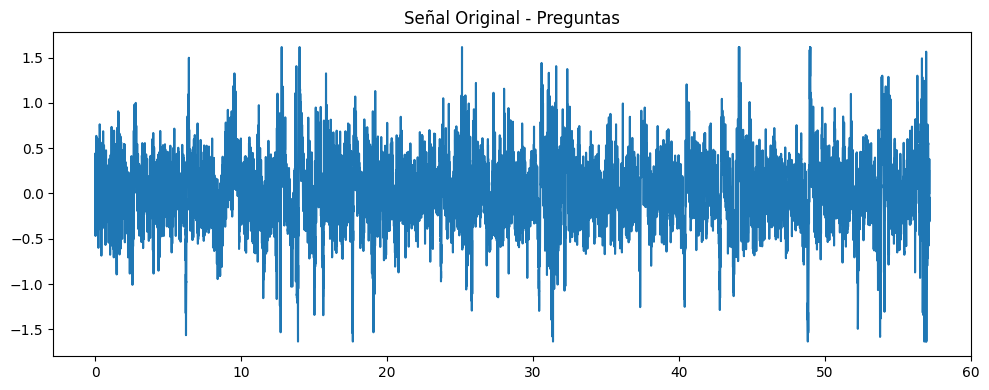

In [74]:

# Realizar la descomposición en wavelets
coeffs = pywt.wavedec(datos2, 'db8', level=4)

# Establecer un umbral para el denoising
all_coeffs_flat = np.concatenate([c.flatten() for c in coeficientes])


desv = np.median(all_coeffs_flat)/0.6745
sq =  math.sqrt(math.log(len(datos2)))
umbral = desv*sq
print(umbral)

Ts = 1/Fs
# Aplicar el umbral a los coeficientes
coeffs_umbral = [pywt.threshold(c, umbral, mode='soft') for c in coeffs]

# Reconstruir la señal denoised
senal_denoised = pywt.waverec(coeffs_umbral, 'db8')

plt.figure(figsize=(10, 4))
tiempo = np.arange(len(datos2)) / Fs
plt.plot( tiempo,datos2, label='Señal Original')
plt.title('Señal Original - Preguntas')



plt.tight_layout()
plt.show()

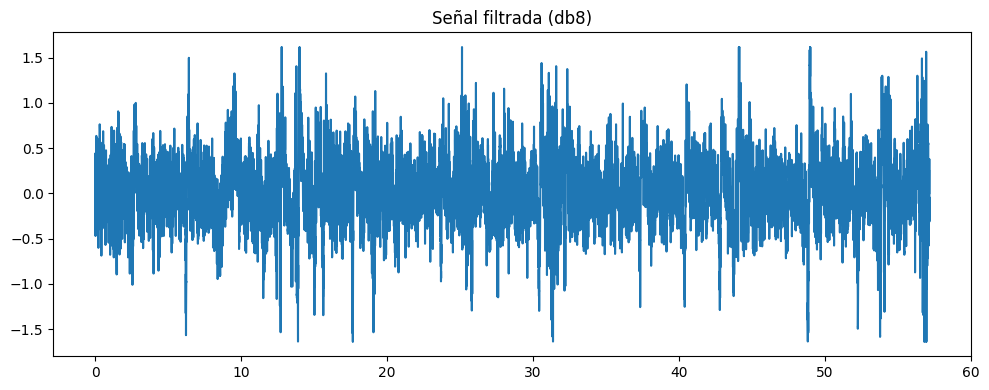

In [75]:

plt.figure(figsize=(10, 4))
plt.plot( tiempo,senal_denoised, label='Señal Denoised')
plt.title('Señal filtrada (db8)')
plt.tight_layout()
plt.show()

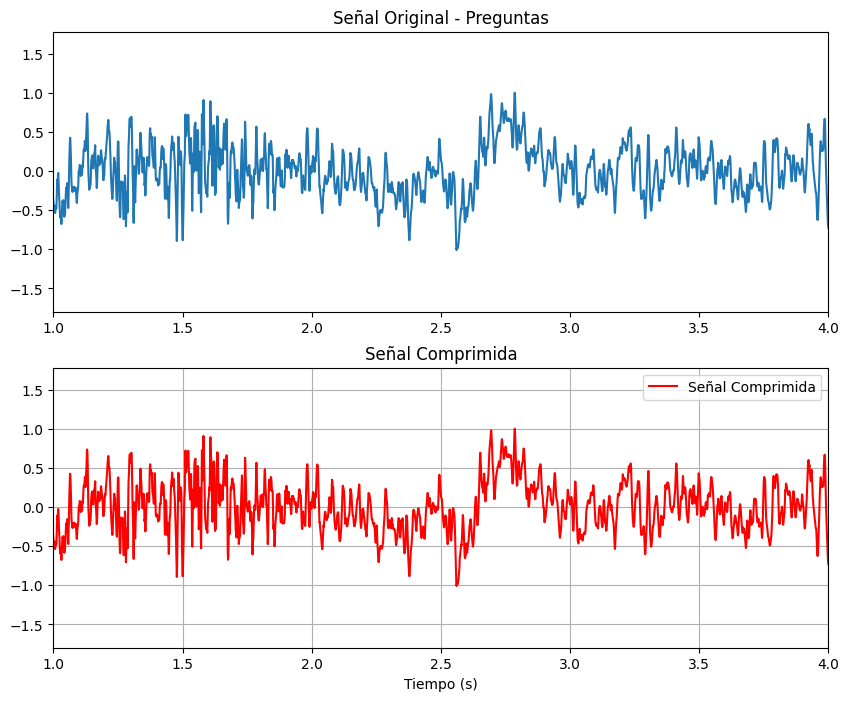

In [36]:
coef_aproximacion = coeffs_umbral[0]

# Reconstruir la señal comprimida
senal_comprimida = pywt.waverec([coef_aproximacion], 'db8')

# Obtener el tiempo correspondiente a los datos
t_2 = np.linspace(0, len(datos2)/1000, len(senal_denoised))  # Suponiendo que la frecuencia de muestreo es 1000 Hz

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(tiempo, datos2, label='Señal Original')
plt.xlim(1,4)
plt.title('Señal Original - Preguntas')


plt.subplot(2, 1, 2)
plt.plot(t_2, senal_denoised, label='Señal Comprimida', color='red')
plt.xlim(1,4)
plt.title('Señal Comprimida')
plt.xlabel('Tiempo (s)')

plt.legend()
plt.grid(True)
plt.show()